<a href="https://colab.research.google.com/github/Soham1306/DLAssignments/blob/main/gates_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-8dd08689dc4a>:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


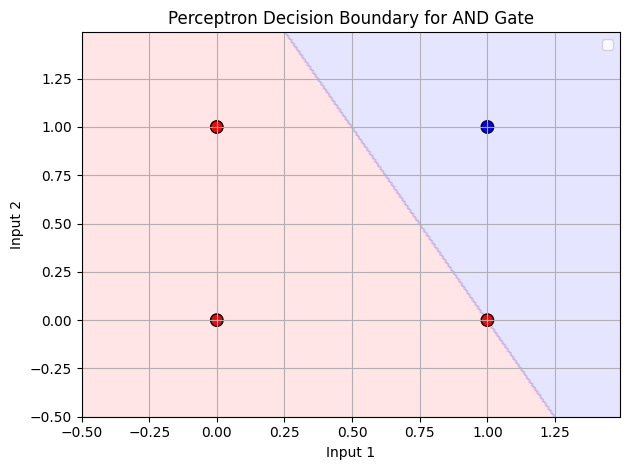

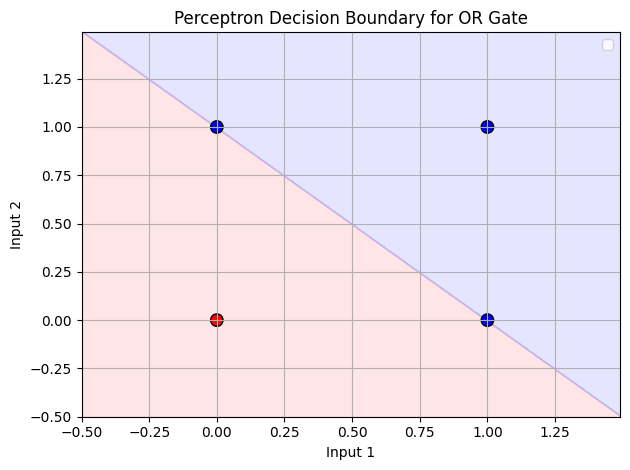

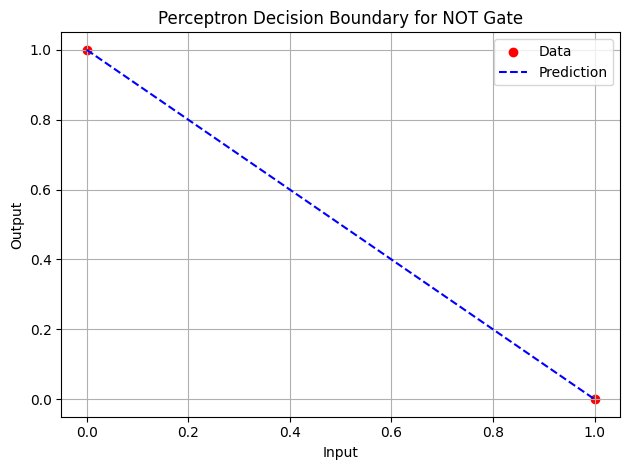

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class PerceptronModel:
    """
    A simple Perceptron classifier for binary classification tasks.
    Supports both single and two-dimensional inputs.
    """
    def __init__(self, learning_rate=0.1, max_iter=500):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Train the perceptron using the provided inputs and labels.

        Parameters:
        - X : numpy array of shape (n_samples, n_features)
        - y : numpy array of shape (n_samples,)
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.max_iter):
            for i in range(n_samples):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if z >= 0 else 0
                error = y[i] - y_pred

                # Perceptron weight update rule
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        """
        Predict binary labels for input samples X.

        Parameters:
        - X : numpy array of shape (n_samples, n_features)

        Returns:
        - predictions : numpy array of 0s and 1s
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

def plot_decision_boundary(X, y, model, title):
    """
    Plot the decision boundary learned by the perceptron.

    Parameters:
    - X : input features
    - y : target labels
    - model : trained PerceptronModel object
    - title : title for the plot
    """
    plt.figure()

    if X.shape[1] == 1:
        # For 1D inputs (e.g., NOT gate)
        plt.scatter(X, y, color='red', marker='o', label='Data')
        plt.plot(X, model.predict(X), color='blue', linestyle='--', label='Prediction')
        plt.xlabel("Input")
        plt.ylabel("Output")
    else:
        # For 2D inputs (e.g., AND, OR gates)
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class labels over the grid
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(grid).reshape(xx.shape)

        # Plot decision regions
        cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['red', 'blue']),
                    edgecolors='k', s=80)
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define input/output pairs for common logic gates
logic_gates = {
    "AND": {
        "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        "y": np.array([0, 0, 0, 1])
    },
    "OR": {
        "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        "y": np.array([0, 1, 1, 1])
    },
    "NOT": {
        "X": np.array([[0], [1]]),
        "y": np.array([1, 0])  # Note: NOT gate has a single input
    }
}

# Train and visualize each logic gate
for gate_name, data in logic_gates.items():
    perceptron = PerceptronModel(learning_rate=0.1, max_iter=500)
    perceptron.fit(data["X"], data["y"])
    plot_decision_boundary(data["X"], data["y"], perceptron, f"Perceptron Decision Boundary for {gate_name} Gate")
